In [1]:
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# Download dataset (using requests)
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

resp = requests.get(URL, timeout=30)
resp.raise_for_status()
dataset_part_2_csv = io.BytesIO(resp.content)

df = pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
# Inspect columns and basic types
print("Columns:", df.columns.tolist())
print(df.info())

# Some cleaning in case: strip column names
df.columns = [c.strip() for c in df.columns]

# Check for NaNs in key columns
print("Missing FlightNumber:", df['FlightNumber'].isna().sum())
print("Missing LaunchSite:", df['LaunchSite'].isna().sum())
print("Missing PayloadMass:", df['PayloadMass'].isna().sum())

Columns: ['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float6

<Figure size 1200x600 with 0 Axes>

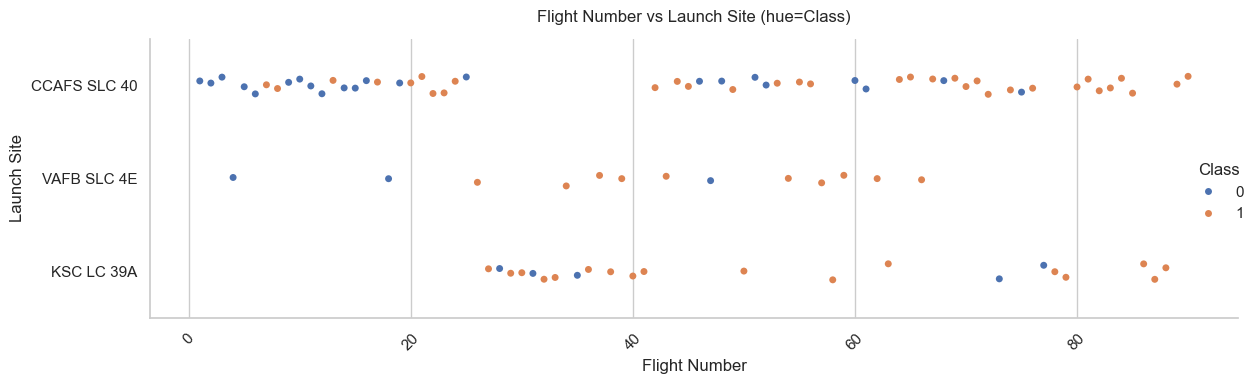

In [4]:
# Task 1: Visualize relationship between FlightNumber and LaunchSite using catplot
# Ensure the columns used are present: 'FlightNumber', 'LaunchSite', 'Class' (Class is 0/1)
plt.figure(figsize=(12,6))
g = sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=3, height=4, jitter=True)
g.set_axis_labels("Flight Number", "Launch Site")
plt.title("Flight Number vs Launch Site (hue=Class)", pad=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

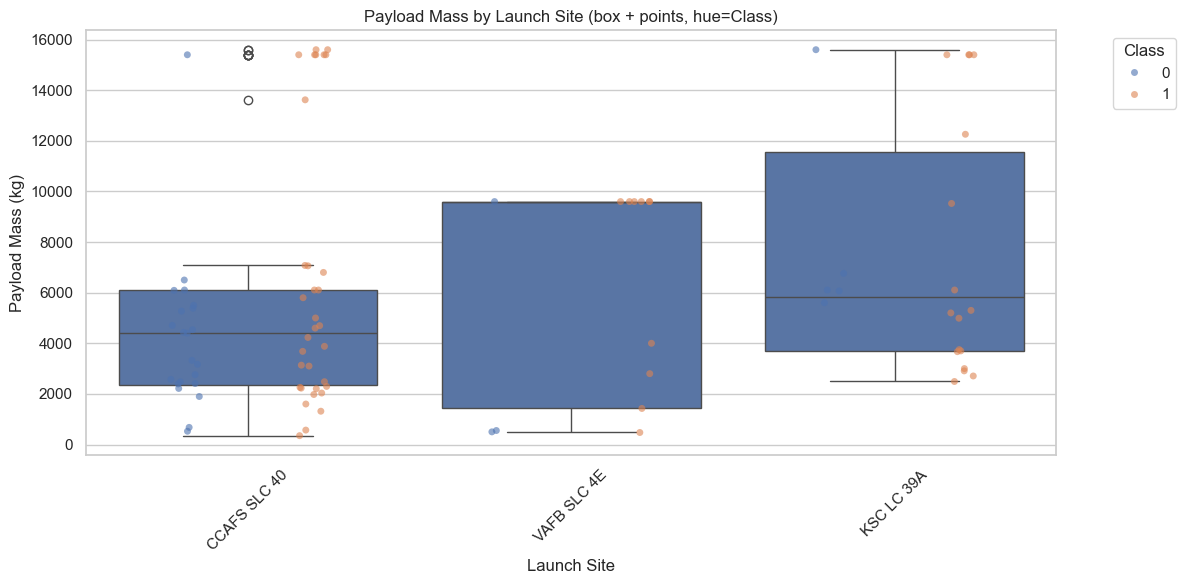

In [5]:
# Task 2: relationship between PayloadMass and LaunchSite
plt.figure(figsize=(12,6))
# Use a boxplot + strip overlay for clarity
sns.boxplot(x="LaunchSite", y="PayloadMass", data=df)
sns.stripplot(x="LaunchSite", y="PayloadMass", data=df, hue="Class", dodge=True, jitter=True, alpha=0.6)
plt.xlabel("Launch Site")
plt.ylabel("Payload Mass (kg)")
plt.title("Payload Mass by Launch Site (box + points, hue=Class)")
plt.xticks(rotation=45)
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

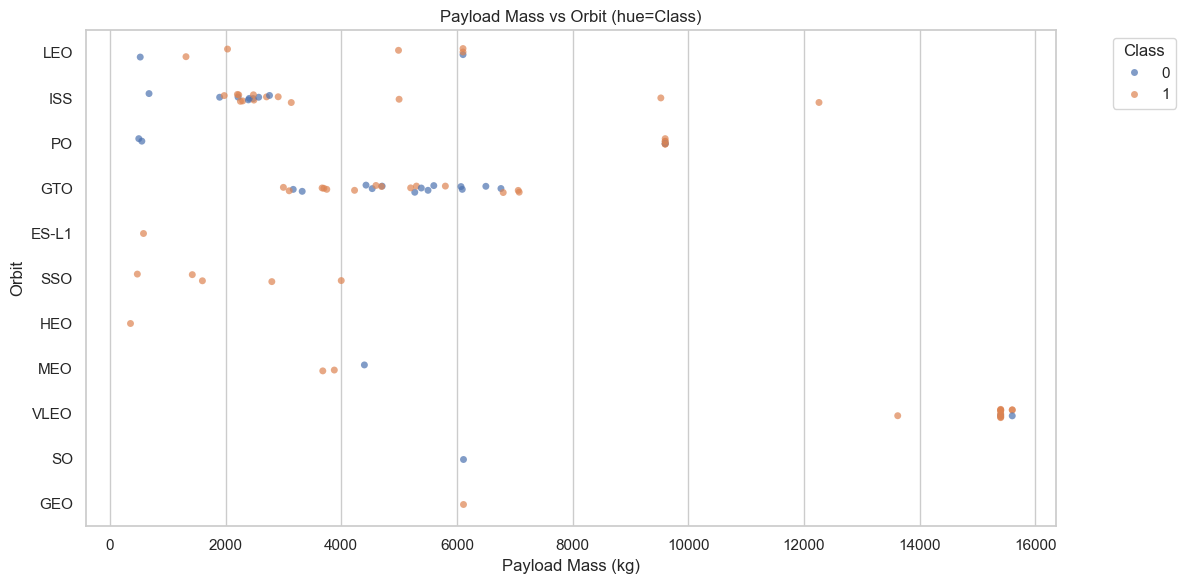

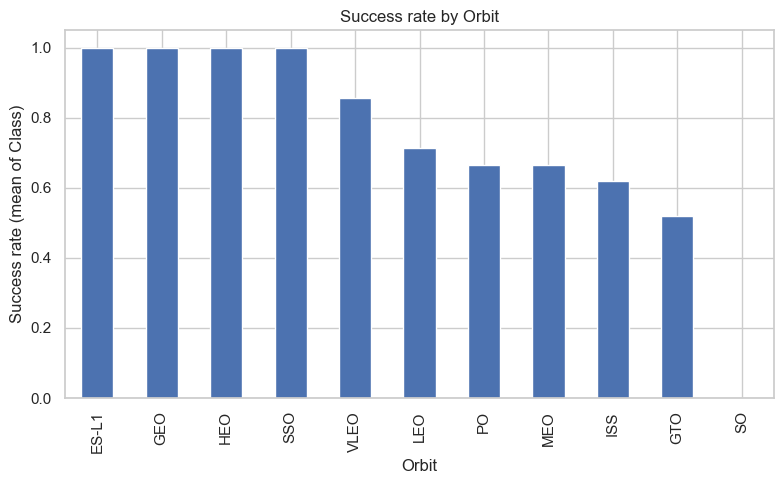

In [6]:
# Task 3: show payload mass vs orbit and show Class distribution
plt.figure(figsize=(12,6))
sns.stripplot(x="PayloadMass", y="Orbit", data=df, hue="Class", jitter=True, alpha=0.7)
plt.xlabel("Payload Mass (kg)")
plt.title("Payload Mass vs Orbit (hue=Class)")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Also show success rate per Orbit
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
orbit_success.plot(kind='bar')
plt.ylabel('Success rate (mean of Class)')
plt.title('Success rate by Orbit')
plt.tight_layout()
plt.show()

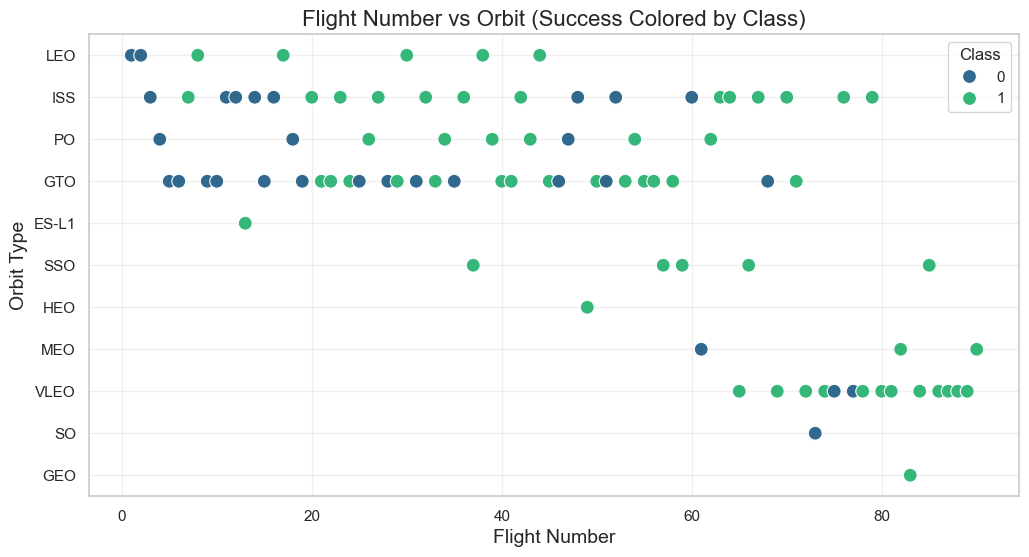

In [7]:
# TASK 4: Scatter plot of FlightNumber vs Orbit, colored by Class

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    s=100,
    palette="viridis"
)

plt.title("Flight Number vs Orbit (Success Colored by Class)", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

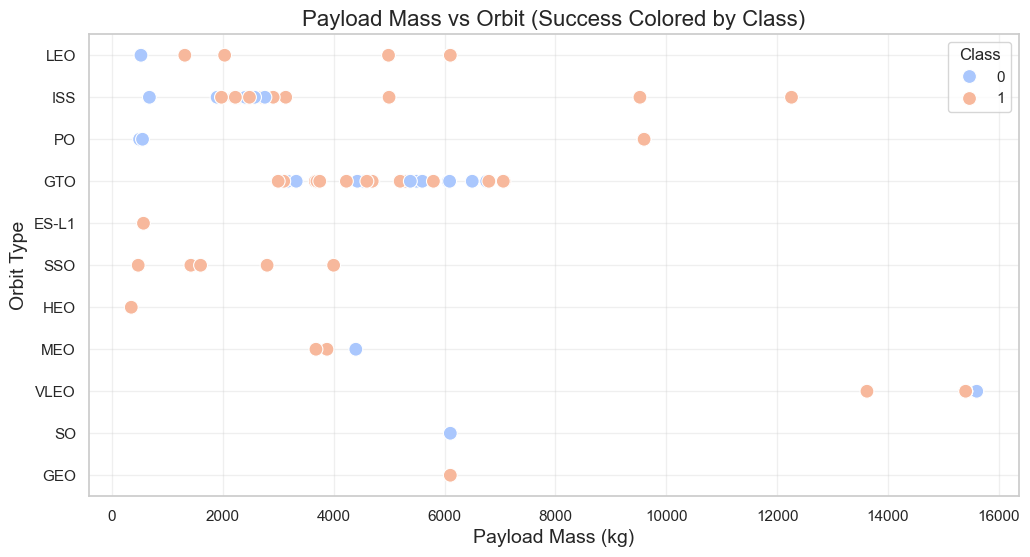

In [8]:
# TASK 5: Scatter plot of Payload Mass vs Orbit, colored by Class

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    s=100,
    palette="coolwarm"
)

plt.title("Payload Mass vs Orbit (Success Colored by Class)", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

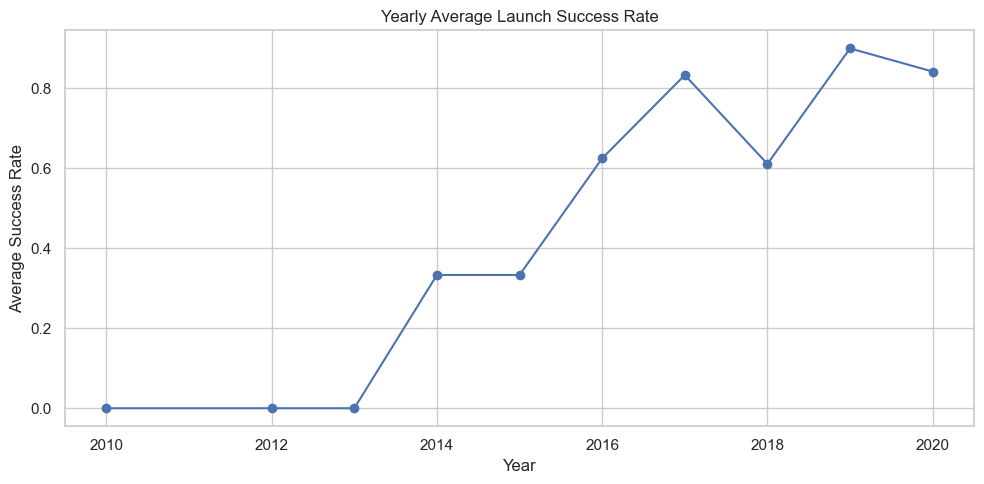

Yearly success rates:
Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64


In [9]:
# Robust year extraction from Date field. Date might be 'YYYY-MM-DD' or other formats.
# Convert to datetime where possible, fallback to extracting first 4-digit year token.

def extract_year_safe(val):
    if pd.isna(val): 
        return np.nan
    s = str(val).strip()
    # try pandas to_datetime
    try:
        dt = pd.to_datetime(s, errors='coerce')
        if not pd.isna(dt):
            return dt.year
    except:
        pass
    # fallback: regex for 4-digit year
    import re
    m = re.search(r'(19|20)\d{2}', s)
    if m:
        return int(m.group(0))
    return np.nan

df['Year'] = df['Date'].apply(extract_year_safe)

# compute yearly average success
yearly = df.groupby('Year')['Class'].mean().dropna().sort_index()
plt.figure(figsize=(10,5))
yearly.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Average Launch Success Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Yearly success rates:")
print(yearly)

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004
